In [24]:
library("quanteda")
library("readtext")
library("spacyr")
library("tidyverse")
library("tidytext")

In [8]:
congress <- readRDS("datasets/twitter/uss.rds")
uss <- readRDS("datasets/twitter/uss-tweets.rds")

In [12]:
head(congress, 3)

,user_id,ideology
3,7334402,0.06996857
4,33537967,0.19317973
10,55677432,0.75129201


In [13]:
head(uss, 3)

status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
952725846309195781,2018-01-15 02:15:17,7334402,alfranken,“We bested the Saints!” —My four-year-old grandson Joe “Holy moly!!!” —Me https://t.co/gSZRDEyJX9,Twitter for iPhone,74,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
949789000923078656,2018-01-06 23:45:18,7334402,alfranken,"Hey everybody, I have something that's really important to share: Tina Smith, our new U.S. Senator for Minnesota, has shown time and time again that she's committed to fighting for you, and now we need to do the same for her. So please do something for me. Follow @TinaSmithMN. https://t.co/bkgnSERHMQ",Twitter for iPhone,277,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
946543634496806912,2017-12-29 00:49:23,7334402,alfranken,"Working on behalf of the people of Minnesota has been the honor of my life and I could not have done this without the help of my family, friends, and supporters. Thank you. https://t.co/FQwc5qYhHP",Twitter Web Client,196,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"


In [14]:
uss <- left_join(uss, congress)
head(uss, 3)

Joining, by = "user_id"


status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,ideology
952725846309195781,2018-01-15 02:15:17,7334402,alfranken,“We bested the Saints!” —My four-year-old grandson Joe “Holy moly!!!” —Me https://t.co/gSZRDEyJX9,Twitter for iPhone,74,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
949789000923078656,2018-01-06 23:45:18,7334402,alfranken,"Hey everybody, I have something that's really important to share: Tina Smith, our new U.S. Senator for Minnesota, has shown time and time again that she's committed to fighting for you, and now we need to do the same for her. So please do something for me. Follow @TinaSmithMN. https://t.co/bkgnSERHMQ",Twitter for iPhone,277,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
946543634496806912,2017-12-29 00:49:23,7334402,alfranken,"Working on behalf of the people of Minnesota has been the honor of my life and I could not have done this without the help of my family, friends, and supporters. Thank you. https://t.co/FQwc5qYhHP",Twitter Web Client,196,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857


In [15]:
uss <- unique(as_tibble(uss))

In [16]:
head(uss, 3)

status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,ideology
952725846309195781,2018-01-15 02:15:17,7334402,alfranken,“We bested the Saints!” —My four-year-old grandson Joe “Holy moly!!!” —Me https://t.co/gSZRDEyJX9,Twitter for iPhone,74,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
949789000923078656,2018-01-06 23:45:18,7334402,alfranken,"Hey everybody, I have something that's really important to share: Tina Smith, our new U.S. Senator for Minnesota, has shown time and time again that she's committed to fighting for you, and now we need to do the same for her. So please do something for me. Follow @TinaSmithMN. https://t.co/bkgnSERHMQ",Twitter for iPhone,277,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
946543634496806912,2017-12-29 00:49:23,7334402,alfranken,"Working on behalf of the people of Minnesota has been the honor of my life and I could not have done this without the help of my family, friends, and supporters. Thank you. https://t.co/FQwc5qYhHP",Twitter Web Client,196,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857


In [17]:
# remove URLS
uss$text <- stringr::str_replace_all(uss$text, "https?[[:graph:]]+", "")

head(uss, 2)

status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,ideology
952725846309195781,2018-01-15 02:15:17,7334402,alfranken,“We bested the Saints!” —My four-year-old grandson Joe “Holy moly!!!” —Me,Twitter for iPhone,74,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
949789000923078656,2018-01-06 23:45:18,7334402,alfranken,"Hey everybody, I have something that's really important to share: Tina Smith, our new U.S. Senator for Minnesota, has shown time and time again that she's committed to fighting for you, and now we need to do the same for her. So please do something for me. Follow @TinaSmithMN.",Twitter for iPhone,277,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857


In [18]:
# remove screennames

uss$text <- stringr::str_replace_all(uss$text, "@\\S+", "")

head(uss, 2)

status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,ideology
952725846309195781,2018-01-15 02:15:17,7334402,alfranken,“We bested the Saints!” —My four-year-old grandson Joe “Holy moly!!!” —Me,Twitter for iPhone,74,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857
949789000923078656,2018-01-06 23:45:18,7334402,alfranken,"Hey everybody, I have something that's really important to share: Tina Smith, our new U.S. Senator for Minnesota, has shown time and time again that she's committed to fighting for you, and now we need to do the same for her. So please do something for me. Follow",Twitter for iPhone,277,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA",0.06996857


In [25]:
# conduct sentiment analysis on the tweets by examining the use of positive words

# tokenize by word
usst <- tidytext::unnest_tokens(uss[, c("user_id", "text", "ideology")], word, text)

head(usst)

user_id,ideology,word
7334402,0.06996857,we
7334402,0.06996857,bested
7334402,0.06996857,the
7334402,0.06996857,saints
7334402,0.06996857,my
7334402,0.06996857,four


In [26]:
# negative words from bing

bing_neg <- get_sentiments("bing") %>%
    filter(sentiment == "negative")

head(bing_neg)

word,sentiment
2-faced,negative
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative


In [27]:
# join with tokenized data and count it!

sa <- usst %>%
    mutate(party = ifelse(ideology > 0.5, "R", "D")) %>%
    inner_join(bing_neg) %>%
    group_by(party) %>%
    count(word, sort = TRUE)

head(sa)

Joining, by = "word"


party,word,n
R,issues,94
D,crisis,92
D,hard,72
R,hard,71
R,critical,63
D,critical,62


In [29]:
# remove some domain specific words

sas <- sa %>%
    filter(!word %in% c("trump", "conservative", "liberal") & n > 1) %>%
    group_by(word) %>%
    mutate(tot = n()) %>%
    ungroup() %>%
    filter(tot == 2) %>%
    select(-tot)

head(sas)

party,word,n
R,issues,94
D,crisis,92
D,hard,72
R,hard,71
R,critical,63
D,critical,62


In [30]:
# pull the n-most used negative words from each group

n <- 20

sas10 <- sas %>%
    spread(party, n) %>%
    mutate(d = D / (D + R)) %>%
    arrange(-d) %>%
    .[c(1:n, (nrow(.) - (n - 1)) : nrow(.)), ] %>%
    select(-D, -R) %>%
    mutate(r = 1 - d) %>%
    gather(party, prop, -word) %>%
    mutate(word = factor(word, levels = unique(word)))

head(sas10)

word,party,prop
assault,d,0.9583333
interference,d,0.9166667
misleading,d,0.8571429
undermine,d,0.8571429
fear,d,0.8484848
confront,d,0.8333333


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

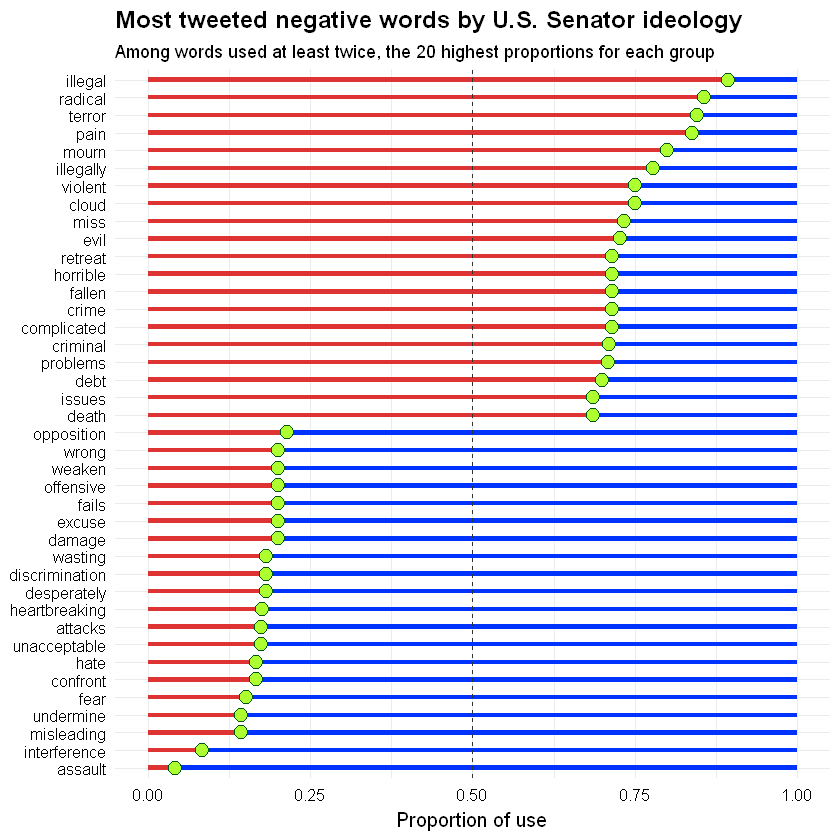

In [32]:
## plot the [filled] proportions using geom_col and stylize with geom_point

sas10 %>%
    ggplot(aes(word, prop, fill = party)) +
    geom_col(width = .25, show.legend = FALSE) +
    labs(y = "Proportion of use", x = NULL,
        title = "Most tweeted negative words by U.S. Senator ideology",
        subtitle = "Among words used at least twice, the 20 highest proportions for each group") +
    coord_flip() + 
    scale_fill_manual(values = c(r = "#dd3333", d = "#0033ff")) + 
    theme_minimal(base_size = 12, base_family = "Arial Narrow") + 
    theme(strip.placement = "outside", 
        plot.title = element_text(face = "bold"),
        axis.text = element_text(colour = "black")) + 
    geom_hline(yintercept = .50, linetype = 2, 
        colour = "gray20") +
    geom_point(data = filter(sas10, party == "r"), aes(y = prop), fill = "greenyellow",
        size = 3.5, shape = 21, colour = "#005511")

In [36]:
## 4-word ngrams data
ng <- tidytext::unnest_tokens(uss[, c("user_id", "text", "ideology")], 
                              word, text, token = "ngrams", n = 4)

head(ng, 3)

user_id,ideology,word
1061029050,0.5369619,released the newest episode
1061029050,0.5369619,the newest episode of
1061029050,0.5369619,newest episode of my


In [37]:
## create party variable, count ngrams and select top 10 for each
ng %>%
    mutate(party = ifelse(ideology > .5, "D", "R")) %>%
    group_by(party) %>%
    count(word, sort = TRUE) %>%
    arrange(party, -n) %>%
    top_n(10, n)

party,word,n
D,i look forward to,58
D,on the senate floor,44
D,state of the union,32
D,thank you for your,30
D,my statement on the,24
D,look forward to working,23
D,pain capable unborn child,21
D,as a result of,20
D,capable unborn child protection,20
D,unborn child protection act,20
